In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

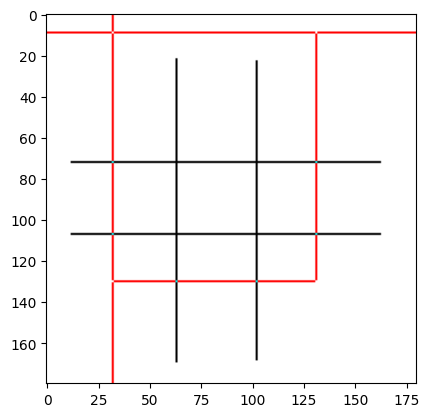

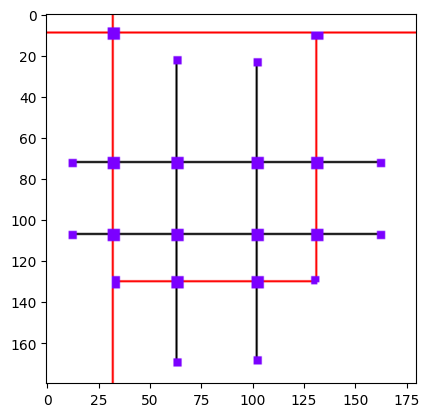

In [ ]:
img = cv.imread("../../img/lines.png")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img[dst>0.01*dst.max()]=[123,0,255]
plt.imshow(img)

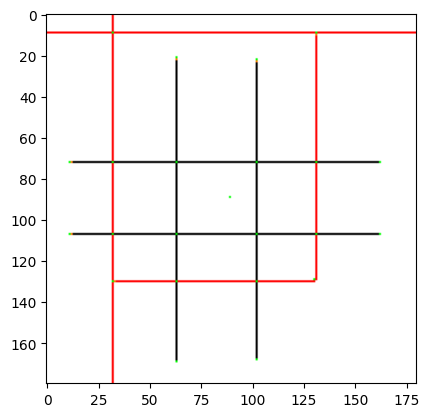

In [21]:
img = cv.imread("../../img/lines.png")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
res = np.hstack((centroids,corners))
res = np.intp(res)
img[res[:,1],res[:,0]]=[255,123,0]
img[res[:,3],res[:,2]] = [0,255,0]
plt.imshow(img)